# 1. Import Libraries and Data

In [1421]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [1422]:
# Configure API key 

quandl.ApiConfig.api_key = 'xMeIF6JC'

In [1423]:
path = '/Users/ryumugil/Downloads/Achievement 6 Analysis/02 Data/Original Data'

# Import City Temperature data
cityTemp_clean  = pd.read_csv(os.path.join(path, 'city_temperature_cleaned.csv'))
cityTemp_clean

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9
...,...,...,...,...,...,...,...,...
999995,Europe,Yugoslavia,NaN,Belgrade,8.0,31.0,2005.0,72.5
999996,Europe,Yugoslavia,NaN,Belgrade,9.0,1.0,2005.0,72.7
999997,Europe,Yugoslavia,NaN,Belgrade,9.0,2.0,2005.0,70.3
999998,NaN,Tanzania,NaN,Dar Es Salaam,3.0,10.0,2001.0,-99.0


In [1424]:

# Import IMF Countries data
IMF_Countries = pd.read_csv(os.path.join(path, 'QDL_ODA.csv'))
IMF_Countries

,Country,date,value
0,USA_NGDP_D,1980-12-31,42.246
1,USA_NGDP_D,1981-12-31,46.243
2,USA_NGDP_D,1982-12-31,49.100
3,USA_NGDP_D,1983-12-31,51.023
4,USA_NGDP_D,1984-12-31,52.865
...,...,...,...
504107,EU_PWOOLW,2024-12-31,NaN
504108,EU_PWOOLW,2025-12-31,NaN
504109,EU_PWOOLW,2026-12-31,NaN
504110,EU_PWOOLW,2027-12-31,NaN


In [1425]:
country_3_codes = pd.read_csv(os.path.join(path, 'Countries to Alpha 3 code.csv'))
country_3_codes

,Country,Alpha3Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO
...,...,...
188,Venezuela,VEN
189,Vietnam,VNM
190,Yemen,YEM
191,Zambia,ZMB


In [1426]:
IMF_Countries['ExtractedCode'] = IMF_Countries['Country'].str[:3].str.upper().str.rstrip('_')
IMF_Countries.head(50)

,Country,date,value,ExtractedCode
0,USA_NGDP_D,1980-12-31,42.246,USA
1,USA_NGDP_D,1981-12-31,46.243,USA
2,USA_NGDP_D,1982-12-31,49.100,USA
3,USA_NGDP_D,1983-12-31,51.023,USA
4,USA_NGDP_D,1984-12-31,52.865,USA
5,USA_NGDP_D,1985-12-31,54.536,USA
6,USA_NGDP_D,1986-12-31,55.634,USA
7,USA_NGDP_D,1987-12-31,57.010,USA
8,USA_NGDP_D,1988-12-31,59.021,USA
9,USA_NGDP_D,1989-12-31,61.335,USA


In [1427]:
#cityTemp_clean['Alpha3Code'] = country_3_codes['Country'].str[:3]
cityTemp_clean['ExtractedCode'] = cityTemp_clean['Country'].str[:3].str.upper()
#cityTemp_clean = cityTemp_clean.merge(country_3_codes[['Alpha3Code']], left_on='ExtractedCode', right_on='Alpha3Code', how='left')

# Ensure columns are numeric and handle invalid values
for col in ['Year', 'Month', 'Day']:
    cityTemp_clean[col] = pd.to_numeric(cityTemp_clean[col], errors='coerce')

# Filter rows where Year is between 1995 and 2020
cityTemp_clean = cityTemp_clean[cityTemp_clean['Year'].between(1995, 2020)]
cityTemp_clean = cityTemp_clean[cityTemp_clean['Day'].between(1, 31)]
cityTemp_clean = cityTemp_clean[cityTemp_clean['Month'].between(1, 12)]
    
cityTemp_clean['Year'] = cityTemp_clean['Year'].fillna(0).astype(int) 
cityTemp_clean['Month'] = cityTemp_clean['Month'].fillna(0).astype(int) 
cityTemp_clean['Day'] = cityTemp_clean['Day'].fillna(0).astype(int) 

print(cityTemp_clean.iloc[82745])
cityTemp_clean['Date'] = pd.to_datetime(cityTemp_clean[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
cityTemp_clean.head(50)

Region             Africa
Country            Guinea
State                 NaN
City              Conakry
Month                   3
Day                     1
Year                 2008
AvgTemperature      -99.0
ExtractedCode         GUI
Name: 82775, dtype: object


,Region,Country,State,City,Month,Day,Year,AvgTemperature,ExtractedCode,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,ALG,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,ALG,1995-01-02
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,ALG,1995-01-03
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,ALG,1995-01-04
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,ALG,1995-01-05
5,Africa,Algeria,NaN,Algiers,1,6,1995,48.7,ALG,1995-01-06
6,Africa,Algeria,NaN,Algiers,1,7,1995,48.9,ALG,1995-01-07
7,Africa,Algeria,NaN,Algiers,1,8,1995,49.1,ALG,1995-01-08
8,Africa,Algeria,NaN,Algiers,1,9,1995,49.0,ALG,1995-01-09
9,Africa,Algeria,NaN,Algiers,1,10,1995,51.9,ALG,1995-01-10


In [1428]:
cityTemp_clean.iloc[58178]

Region                         Africa
Country                      Ethiopia
State                             NaN
City                      Addis Ababa
Month                               1
Day                                 1
Year                             2015
AvgTemperature                  -99.0
ExtractedCode                     ETH
Date              2015-01-01 00:00:00
Name: 58207, dtype: object

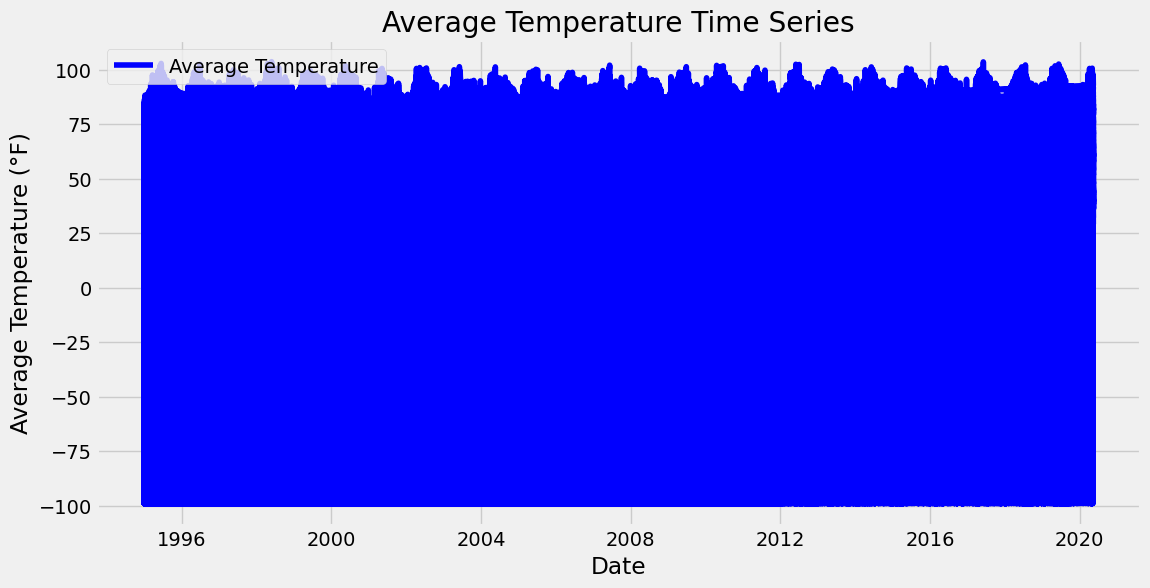

In [1429]:
# Convert 'date' to datetime and set as index
# cityTemp_clean['Date'] =pd.to_datetime(cityTemp_clean[['Day', 'Month', 'Year']])
# cityTemp_clean['Date'] = pd.to_datetime(cityTemp_clean['Date'])
cityTemp_clean.set_index('Date', inplace=True)

# Drop unnecessary columns for plotting
cityTemp_clean = cityTemp_clean[['AvgTemperature']]

# Step 2: Handle missing or invalid data
# Remove rows with missing AvgTemperature (if any)
cityTemp_clean = cityTemp_clean.dropna(subset=['AvgTemperature'])

# Step 3: Plot the time series using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(cityTemp_clean.index, cityTemp_clean['AvgTemperature'], label='Average Temperature', color='blue')
plt.title('Average Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()



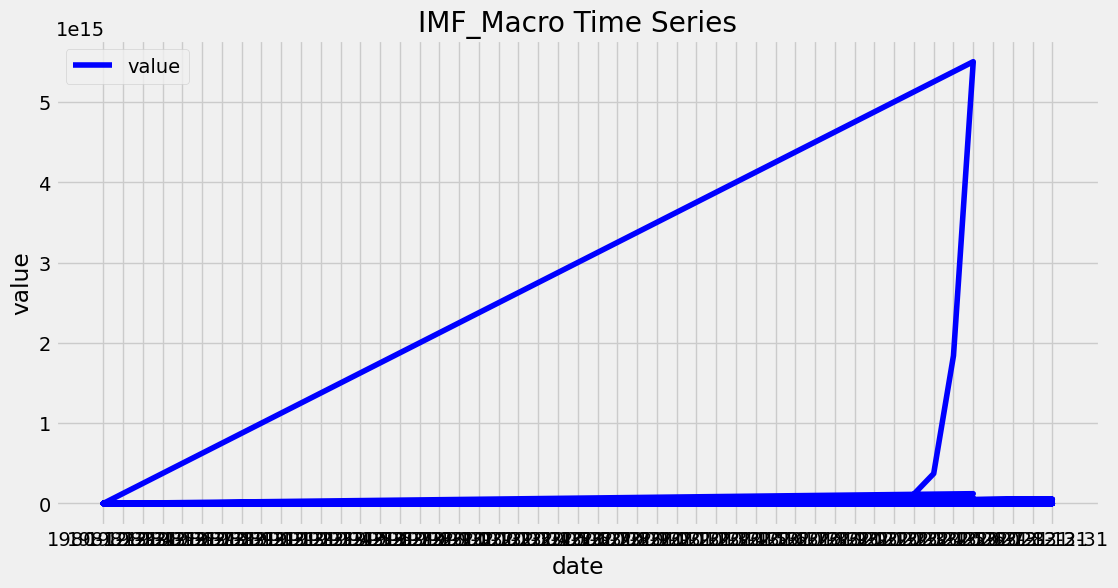

In [1430]:

IMF_Countries.set_index('date', inplace=True)

# Drop unnecessary columns for plotting
IMF_Countries = IMF_Countries[['value']]

# Step 2: Handle missing or invalid data
# Remove rows with missing AvgTemperature (if any)

IMF_Countries = IMF_Countries.dropna(subset=['value'])
 

# Step 3: Plot the time series using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(IMF_Countries.index, IMF_Countries['value'], label='value', color='blue')
plt.title('IMF_Macro Time Series')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()

In [1431]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

Month             0
Year              0
AvgTemperature    0
dtype: int64

In [1432]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

# 3.Time-series analysis: decomposition

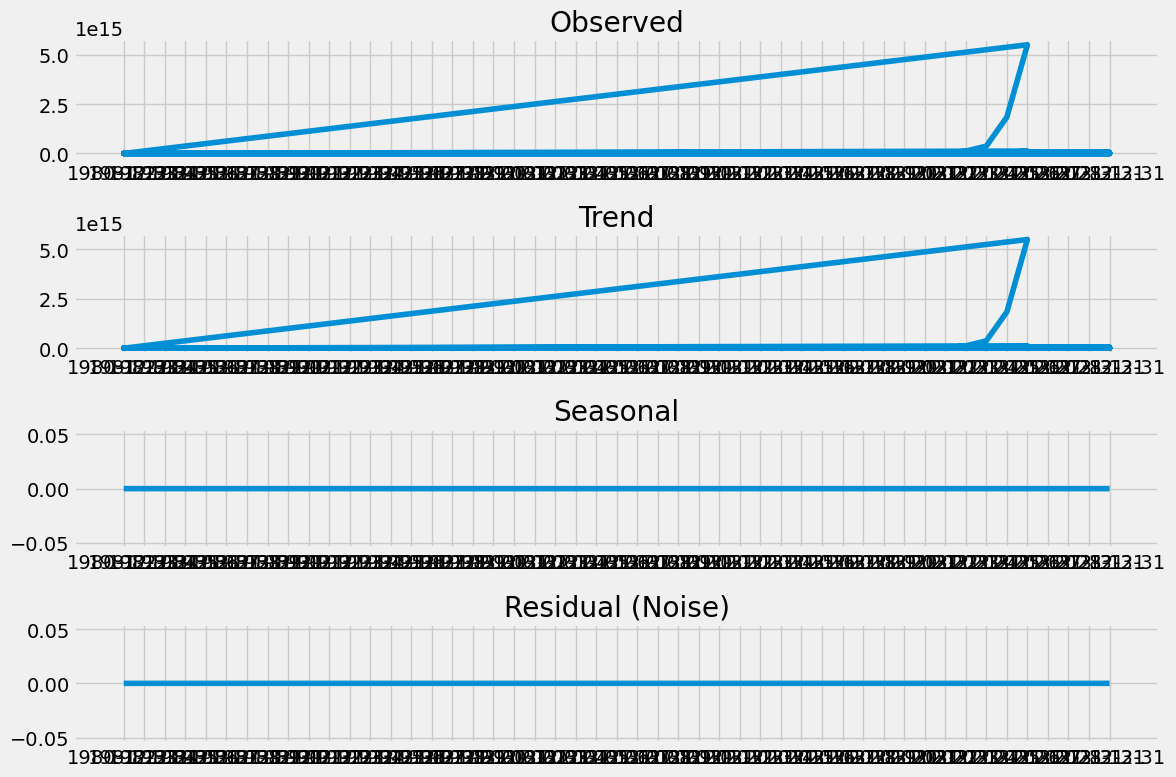

In [1434]:
# Decompose the time series
decomposition = seasonal_decompose(IMF_Countries['value'], model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual (Noise)')

plt.tight_layout()
plt.show()

# 4. Testing for Stationarity

In [1436]:
from statsmodels.tsa.stattools import adfuller
print("adfuller is installed!")

# Perform Dickey-Fuller test
result = adfuller(IMF_Countries['value'])

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Apply the test using the function on the time series


# Interpret the results
if result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")

adfuller is installed!
ADF Statistic: -241.5942944545017
p-value: 0.0
Critical Values: {'1%': -3.430369342610186, '5%': -2.861548549197007, '10%': -2.5667745504268478}
The time series is stationary (reject the null hypothesis).


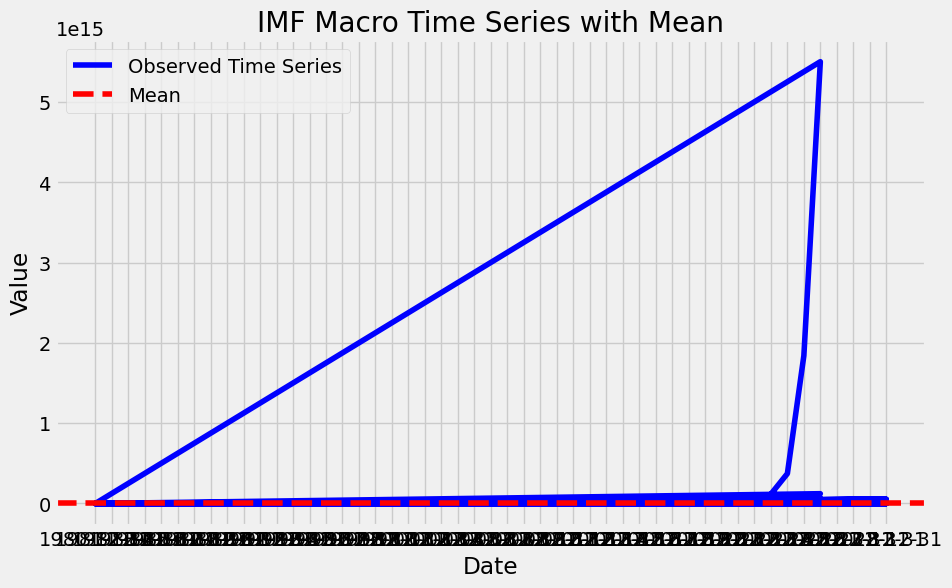

In [1437]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(IMF_Countries.index, IMF_Countries['value'], label='Observed Time Series', color='blue')
plt.axhline(y=IMF_Countries['value'].mean(), color='r', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('IMF Macro Time Series with Mean')
plt.legend()
plt.grid(True)
plt.show()

A p-value > 0.05 and an ADF statistic less negative than the critical value (as expected from the plot's trend) would fail to reject H₀, confirming non-stationarity

ADF Statistic: -103.84688519602535
p-value: 0.0
Critical Values: {'1%': -3.4303693477035324, '5%': -2.8615485514481964, '10%': -2.5667745516250755}
The differenced time series is stationary (reject the null hypothesis).


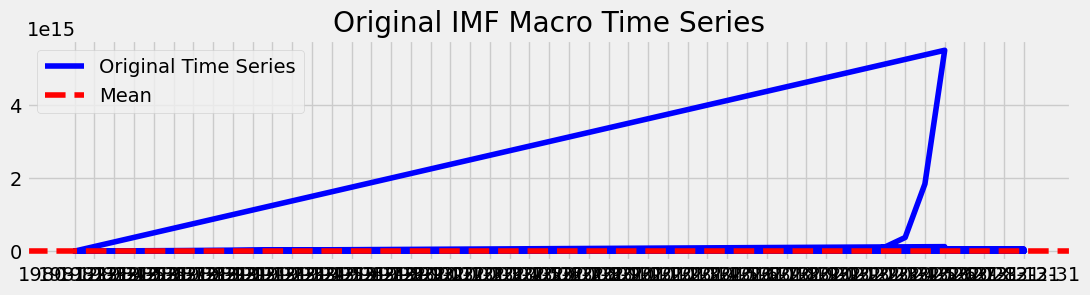

In [1448]:
# Perform first differencing
IMF_Countries['diff_value'] = IMF_Countries['value'].diff()  # Subtract previous value
IMF_Countries_diff = IMF_Countries.dropna()  # Remove the first NaN value from differencing

# Perform Dickey-Fuller test on differenced data
result = adfuller(IMF_Countries_diff['diff_value'])

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] < 0.05:
    print("The differenced time series is stationary (reject the null hypothesis).")
else:
    print("The differenced time series is non-stationary (fail to reject the null hypothesis).")

# Plot the original and differenced time series
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(IMF_Countries.index, IMF_Countries['value'], label='Original Time Series', color='blue')
plt.axhline(y=IMF_Countries['value'].mean(), color='r', linestyle='--', label='Mean')
plt.title('Original IMF Macro Time Series')
plt.legend()
plt.grid(True)


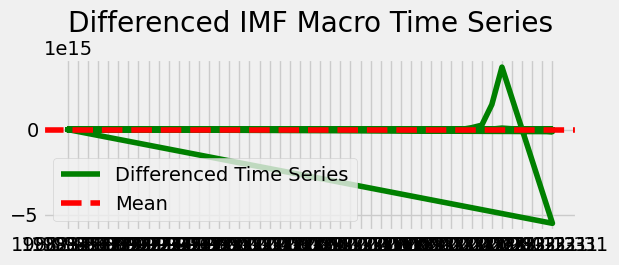

In [1442]:
plt.subplot(2, 1, 2)
plt.plot(IMF_Countries_diff.index, IMF_Countries_diff['diff_value'], label='Differenced Time Series', color='green')
plt.axhline(y=IMF_Countries_diff['diff_value'].mean(), color='r', linestyle='--', label='Mean')
plt.title('Differenced IMF Macro Time Series')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

"IMF Macro Time Series" data, the time series is likely stationary and the first differencing removed the upward trend observed in the original plot, and the test should yield a p-value < 0.05 with an ADF statistic more negative than the critical value (e.g., -2.57 at 5%), indicating rejection of the null hypothesis of non-stationarity. The plot of the differenced data should show fluctuations around a constant mean, supporting this conclusion.

<Figure size 1000x600 with 0 Axes>

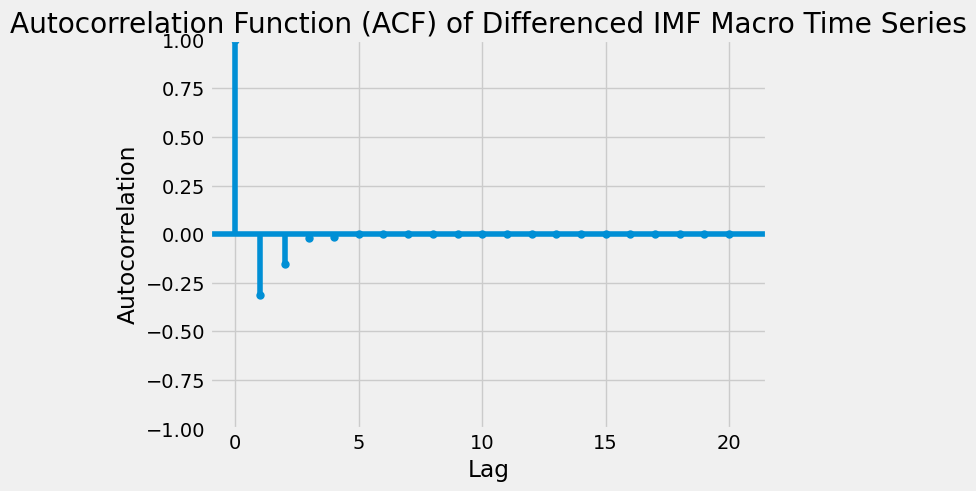

In [1449]:
# Plot ACF for the differenced data
plt.figure(figsize=(10, 6))
plot_acf(IMF_Countries_diff['diff_value'], lags=20, alpha=0.05)  # 20 lags, 95% confidence interval
plt.title('Autocorrelation Function (ACF) of Differenced IMF Macro Time Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

The plot ACF function computes and plots the autocorrelation for up to 20 lags. The blue shaded area represents the 95% confidence interval; bars outside this indicate significant autocorrelation.

Differencing Data: Since the data was differenced to achieve stationarity, the ACF should show a rapid drop-off, with most lags within the confidence interval, confirming no strong linear dependence.

Interpretation: A stationary series typically has autocorrelation that diminishes quickly; significant spikes at early lags might suggest remaining structure (e.g., seasonality), but one differencing should suffice for the trend observed.